<a href="https://colab.research.google.com/github/safdarjung/OIBSIP/blob/main/Car_price_pred_98__acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: code to extract a zip file

!unzip -j archive\ \(1\).zip


Archive:  archive (1).zip
  inflating: car_price_prediction.csv  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

Shape of the DataFrame:
(19237, 17)
-------------------------------------------
Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-

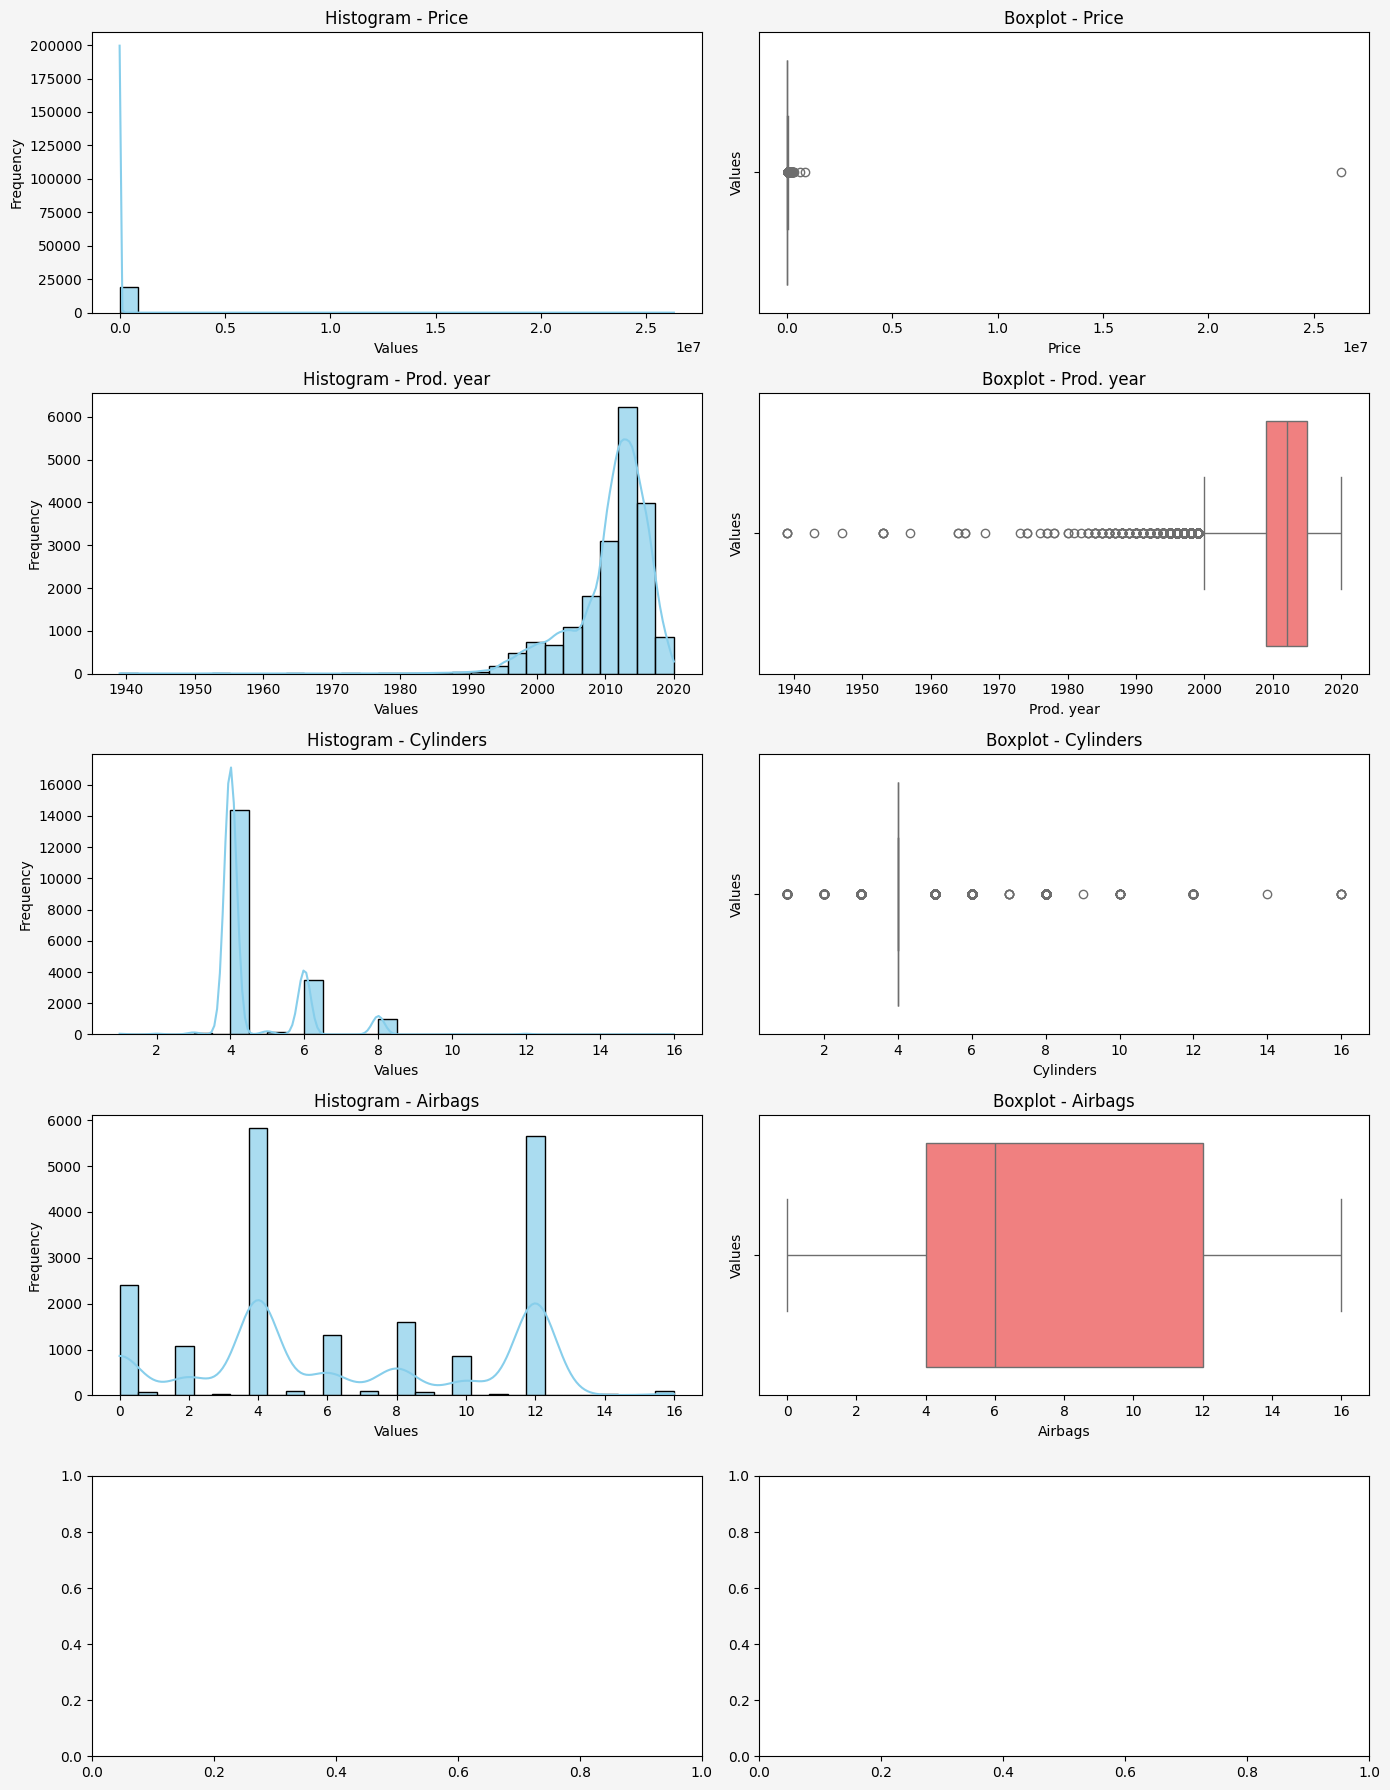

One-hot encoding:
   Price  Prod. year  Cylinders  Airbags  Levy_-  Levy_1011  Levy_1016  \
0  13328        2010        6.0       12       0          0          0   
1  16621        2011        6.0        8       0          0          0   
2   8467        2006        4.0        2       1          0          0   
3   3607        2011        4.0        0       0          0          0   
4  11726        2014        4.0        4       0          0          0   

   Levy_1017  Levy_1018  Levy_1024  ...  Color_Green  Color_Grey  \
0          0          0          0  ...            0           0   
1          0          1          0  ...            0           0   
2          0          0          0  ...            0           0   
3          0          0          0  ...            0           0   
4          0          0          0  ...            0           0   

   Color_Orange  Color_Pink  Color_Purple  Color_Red  Color_Silver  \
0             0           0             0          0      

<ipython-input-40-10e271686936>:99: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


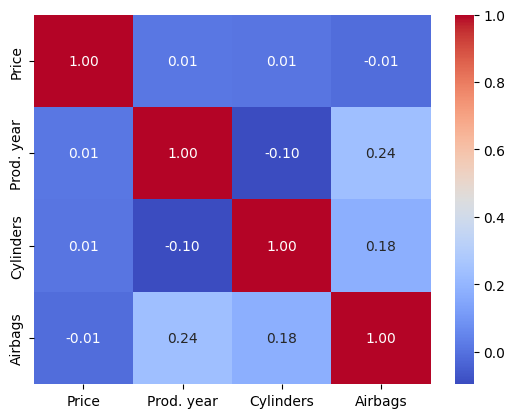

In [ ]:
df=pd.read_csv('/content/car_price_prediction.csv')
df_=df
df=df.drop(columns='ID')
df.drop_duplicates()



    print("Correlation heatmap:")
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()



data_analysis(df)

In [ ]:
df['Levy'] =df['Levy'].replace('-',np.nan)
df['Levy'].astype(float)

# Replace the missing values in Levy with knn imputer
impute = KNNImputer(n_neighbors=5)
df['Levy'] = impute.fit_transform(df['Levy'].values.reshape(-1,1))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

we can use the IQR in boxPlot to remove outliers

In [ ]:
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1
Lbound = Q1-1.5*IQR
Hbound = Q3+1.5*IQR

outliers = ((df['Price']<Lbound)|(df['Price']>Hbound))
df_out_rem = df[~outliers]
np.sum(outliers)

1073

In [ ]:
df = df_out_rem
df.shape

(18164, 17)

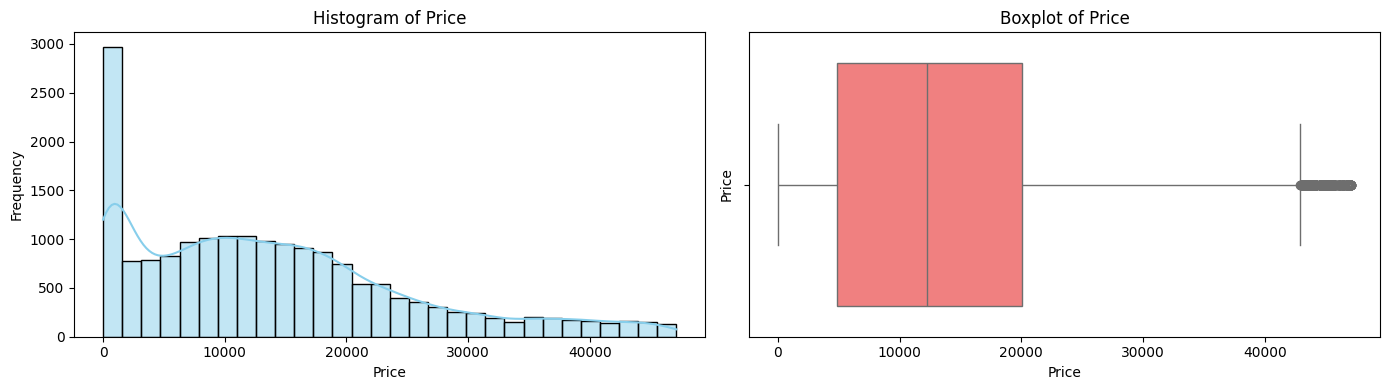

In [ ]:
# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Histogram
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['Price'], color='lightcoral', ax=axes[1], boxprops=dict(facecolor='lightcoral'))
axes[1].set_title('Boxplot of Price')
axes[1].set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


there are a lot of cars with price < 500

In [ ]:
#group by manufacturers and calc avg price of that company

avg_mfg_price= df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
Manufacturer_count =  df['Manufacturer'].value_counts().loc[avg_mfg_price.index]

<ipython-input-47-ff61e66a39d1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index, palette=colors_count, ax=axes[1])


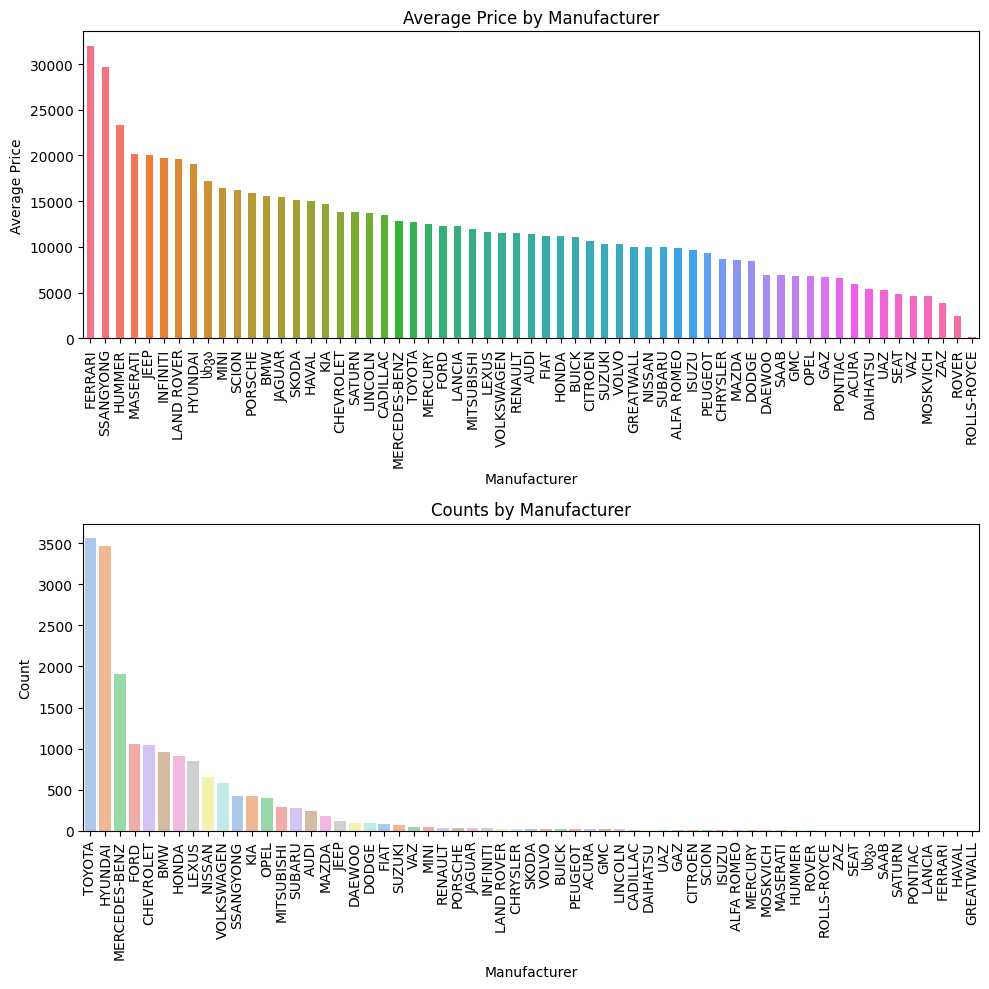

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
# Bar plot (Average Price by Manufacturer)
colors_bar = sns.color_palette('husl', len(avg_mfg_price))
avg_mfg_price.plot(kind='bar', color=colors_bar, ax=axes[0])
axes[0].set_title('Average Price by Manufacturer')
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Average Price')

# Countplot (Counts by Manufacturer)
colors_count = sns.color_palette('pastel',len(Manufacturer_count))
sns.countplot(x='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index, palette=colors_count, ax=axes[1])
axes[1].set_title('Counts by Manufacturer')
axes[1].set_xlabel('Manufacturer')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df.sample(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
5389,16935,1493.000000,TOYOTA,Highlander,2016,Jeep,Yes,Petrol,3.5,0 km,6.0,Automatic,Front,04-May,Left wheel,Silver,12
3795,18000,906.838128,HYUNDAI,Elantra,2014,Coupe,Yes,Petrol,2,100000 km,4.0,Automatic,Front,02-Mar,Left wheel,Black,12
145,18817,609.000000,TOYOTA,Camry,2018,Sedan,Yes,Hybrid,2.5,35058 km,4.0,Automatic,Front,04-May,Left wheel,White,12
15841,19130,585.000000,TOYOTA,Prius,2013,Hatchback,No,Hybrid,1.8,109200 km,4.0,Automatic,Front,04-May,Left wheel,Grey,10
7346,22894,1273.000000,MERCEDES-BENZ,ML 350,2015,Jeep,Yes,Diesel,3.5,79080 km,6.0,Automatic,4x4,04-May,Left wheel,Grey,12
17549,9408,906.838128,TOYOTA,Wish,2005,Minivan,No,Petrol,1.8,230000 km,4.0,Automatic,Front,04-May,Right-hand drive,Grey,8
13915,17562,906.838128,FORD,Escape,2007,Jeep,No,Hybrid,2.3,170000 km,4.0,Automatic,4x4,04-May,Left wheel,Sky blue,12
16235,12858,906.838128,HONDA,FIT,2008,Hatchback,No,Petrol,1.5,145000 km,4.0,Tiptronic,Front,04-May,Right-hand drive,Blue,4
13785,549,1079.000000,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2,46733 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
3955,15681,891.000000,HYUNDAI,Sonata,2016,Sedan,Yes,LPG,2,248705 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
a = df[['Model','Category','Leather interior','Fuel type','Engine volume','Cylinders','Gear box type','Drive wheels','Color']]
for col in a:
  print(col)
  print()
  print(df[col].value_counts())
  print('-------------------------------------------')

Model

Prius                     1082
Sonata                    1017
Elantra                    919
Camry                      914
E 350                      534
                          ... 
1500,1600 Schtufenheck       1
E 420                        1
C 250 luxury                 1
Passat sport                 1
Prius C aqua                 1
Name: Model, Length: 1498, dtype: int64
-------------------------------------------
Category

Sedan          8449
Jeep           4819
Hatchback      2828
Minivan         634
Coupe           481
Universal       342
Microbus        297
Goods wagon     231
Pickup           42
Cabriolet        30
Limousine        11
Name: Category, dtype: int64
-------------------------------------------
Leather interior

Yes    12942
No      5222
Name: Leather interior, dtype: int64
-------------------------------------------
Fuel type

Petrol            9499
Diesel            3667
Hybrid            3534
LPG                885
CNG                494
Plug-in Hybrid

In [ ]:
# Create a new column 'Turbo' based on the presence of 'Turbo' in 'Engine volume'
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)
df['Engine volume'] = df['Engine volume'].replace('Turbo', '', regex=True).astype(float)


In [ ]:
df['Mileage']=df['Mileage'].replace('km','',regex=True).astype(float)

In [ ]:
cat_col=df.select_dtypes(include='object')
l=df[['Airbags','Cylinders']]
cat_col=pd.concat([cat_col,l],axis=1)
cat_col.drop('Manufacturer',axis=1,inplace=True)
cat_col.drop('Model',axis=1,inplace=True)
for c in cat_col :
  print(c,df[c].nunique())



Category 11
Leather interior 2
Fuel type 7
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Color 16
Airbags 17
Cylinders 13


<ipython-input-53-360e7a659cae>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Price',data=df,order=sorted_data,ax=axes[i],ci=None)
<ipython-input-53-360e7a659cae>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Price',data=df,order=sorted_data,ax=axes[i],ci=None)
<ipython-input-53-360e7a659cae>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Price',data=df,order=sorted_data,ax=axes[i],ci=None)
<ipython-input-53-360e7a659cae>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Price',data=df,order=sorted_data,ax=axes[i],ci=None)
<ipython-input-53-360e7a659cae>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Price',data=df,order=sorted_data,

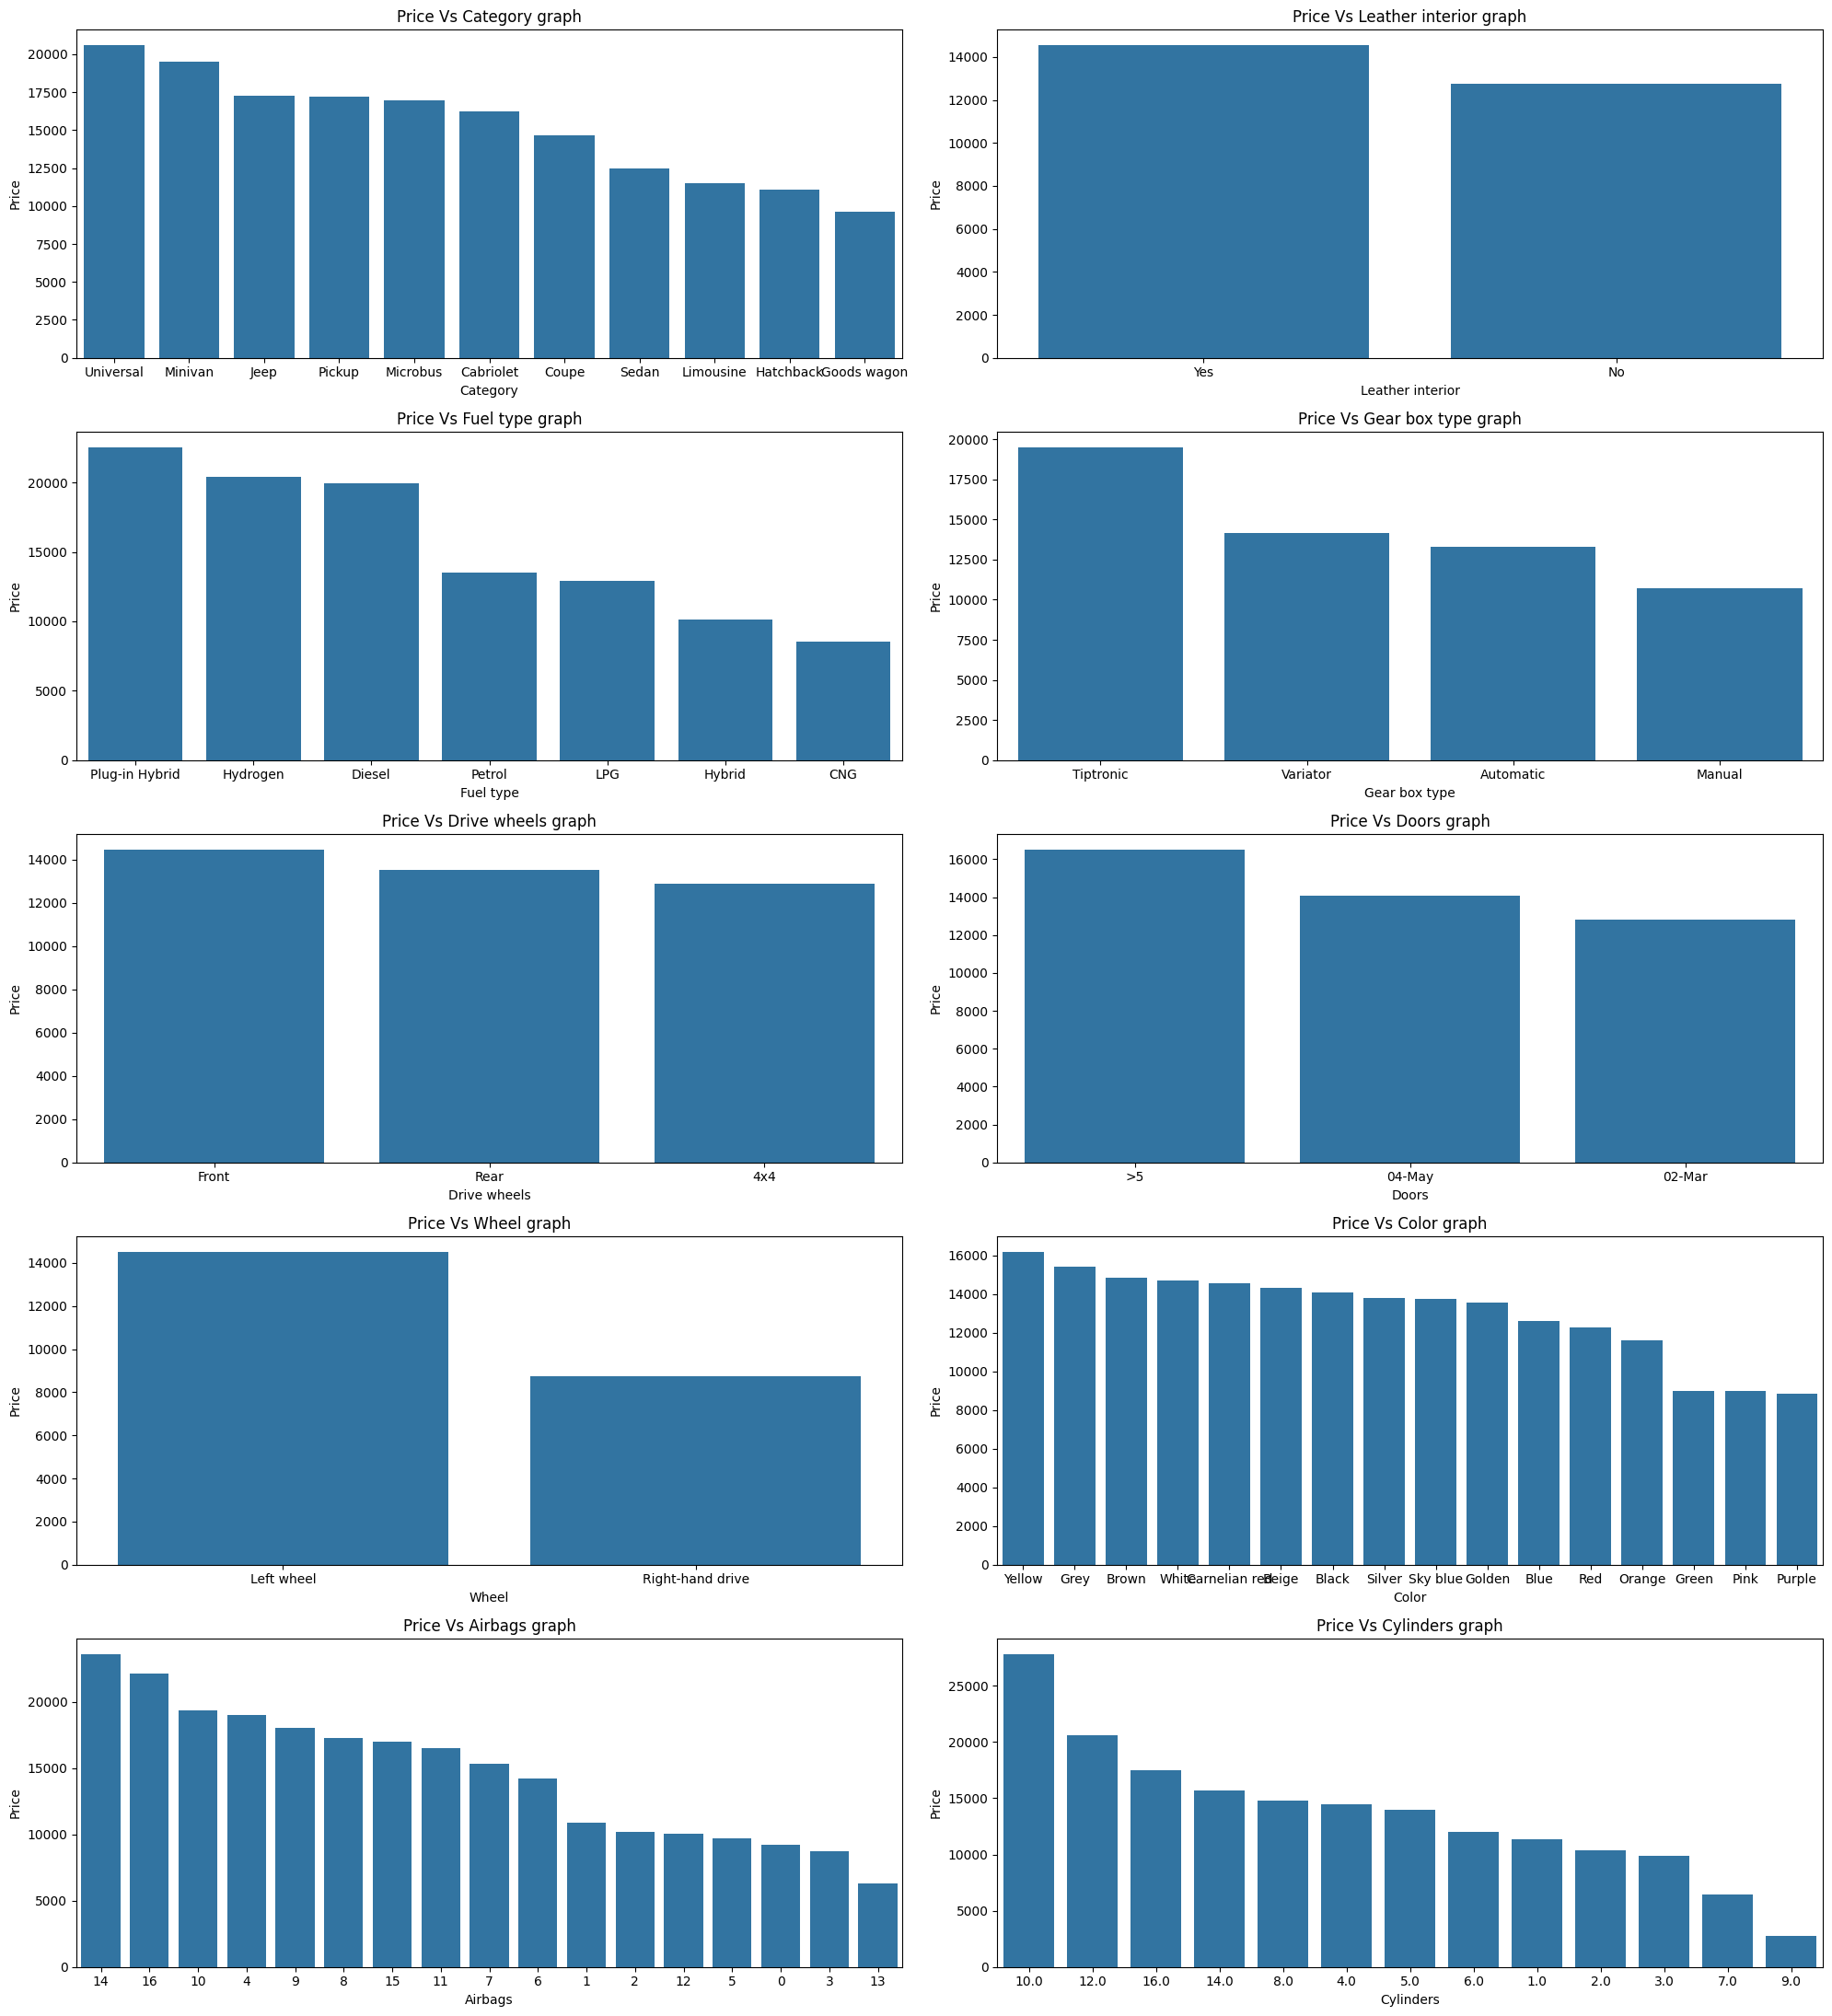

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,22))
axes=axes.flatten()
for i,col in enumerate(cat_col):
  sorted_data=df.groupby(col)['Price'].mean().sort_values(ascending=False).index
  sns.barplot(x=col,y='Price',data=df,order=sorted_data,ax=axes[i],ci=None)
  axes[i].set_title(f"Price Vs {col} graph")
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

In [ ]:
df['Age']=2024-df['Prod. year']
df.drop('Prod. year',axis=1,inplace=True)

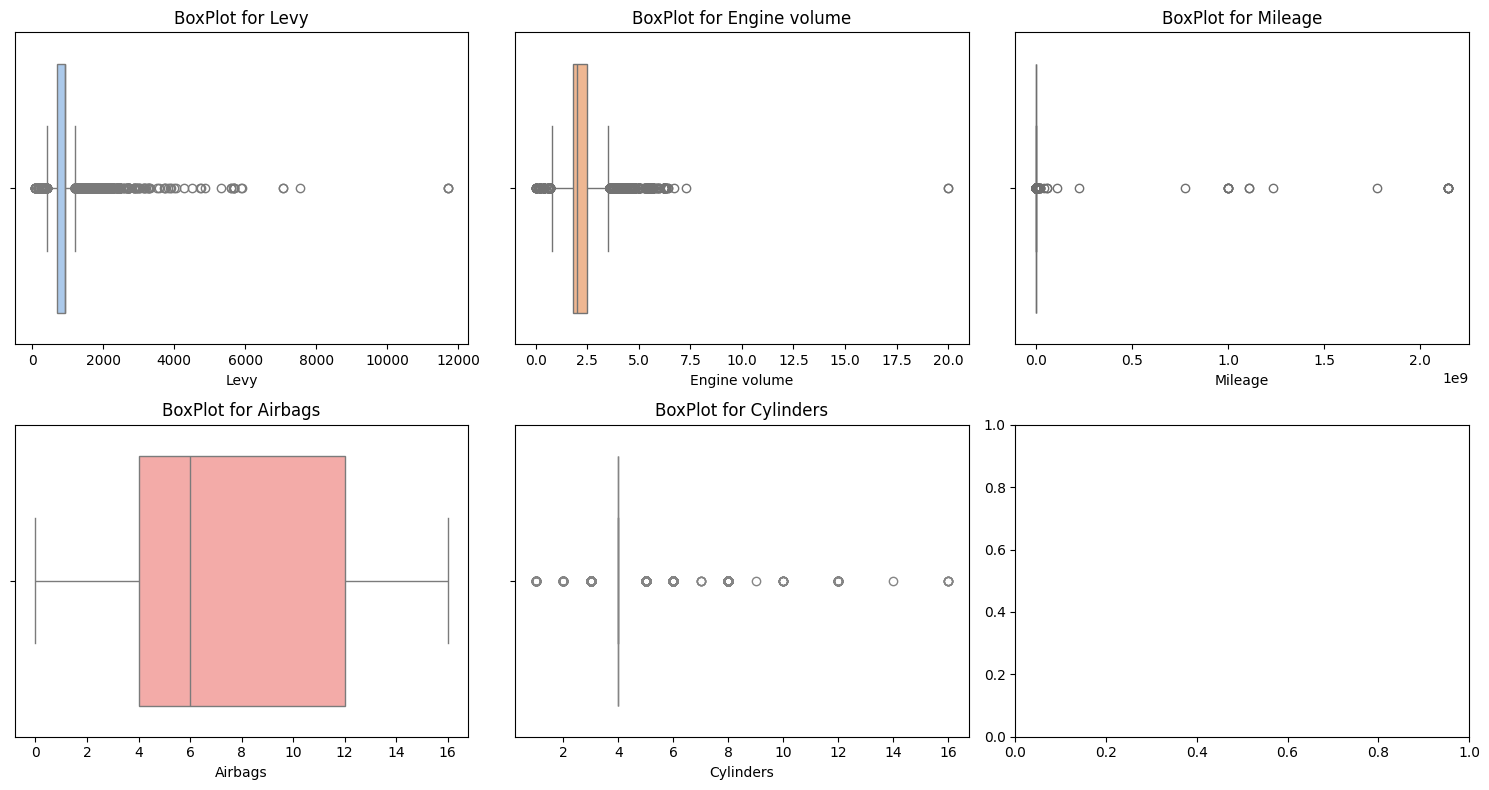

In [ ]:
cols_for_boxplot=['Levy','Engine volume','Mileage','Airbags','Cylinders']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes=axes.flatten()
color_palette = sns.color_palette("pastel")

for i,c in enumerate(cols_for_boxplot):
  sns.boxplot(x=df[c],ax=axes[i],color=color_palette[i])
  axes[i].set_title(f"BoxPlot for {c}")
plt.tight_layout()
plt.show()

In [ ]:
# not usin airbag since its distribution is normal
cols_for_outliers=['Levy','Engine volume','Mileage','Cylinders']
for col in cols_for_outliers:

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  Lbound = Q1-1.5*IQR
  Hbound = Q3+1.5*IQR

  outliers = ((df[col]<Lbound)|(df[col]>Hbound))
  df_out_rem = df[~outliers]
  print(col,np.sum(outliers))

Levy 2739
Engine volume 1172
Mileage 645
Cylinders 4443


In [ ]:
df= df_out_rem
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13721 entries, 2 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13721 non-null  int64  
 1   Levy              13721 non-null  float64
 2   Manufacturer      13721 non-null  object 
 3   Model             13721 non-null  object 
 4   Category          13721 non-null  object 
 5   Leather interior  13721 non-null  object 
 6   Fuel type         13721 non-null  object 
 7   Engine volume     13721 non-null  float64
 8   Mileage           13721 non-null  float64
 9   Cylinders         13721 non-null  float64
 10  Gear box type     13721 non-null  object 
 11  Drive wheels      13721 non-null  object 
 12  Doors             13721 non-null  object 
 13  Wheel             13721 non-null  object 
 14  Color             13721 non-null  object 
 15  Airbags           13721 non-null  int64  
 16  Turbo             13721 non-null  int64 

In [ ]:
pricemt500 = df[df['Price']>=500]
pricemt500.shape

(12648, 18)

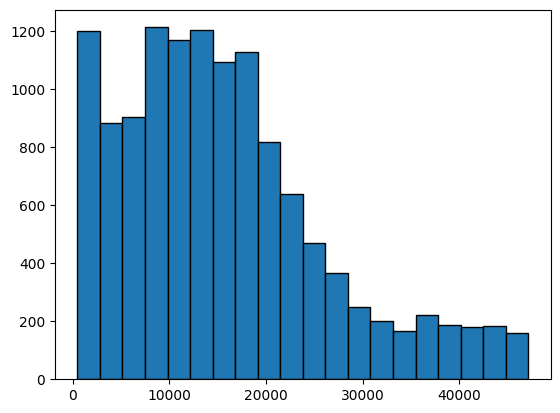

In [ ]:
df = pricemt500
plt.hist(df['Price'],bins=20,edgecolor='black')
plt.show()

now price distribution looks much more better. It is kind of Poisson distribution

<ipython-input-61-c813ab100851>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


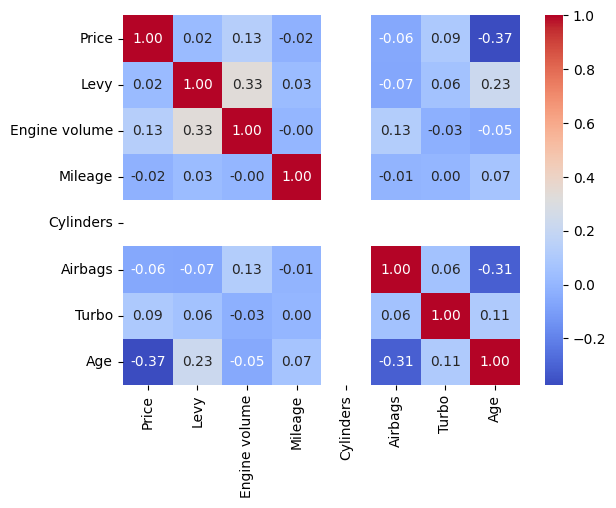

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

all of the features are independent

In [ ]:
from sklearn.preprocessing import  OneHotEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_OHEencoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
# Loop through columns
for column in df_OHEencoded.columns:
    # Check if the column contains boolean values (True/False)
    if df_OHEencoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        df_OHEencoded[column] = df_OHEencoded[column].astype(int)
df_OHEencoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Turbo,Age,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
2,8467,906.838128,1.3,200000.0,4.0,2,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,2.5,168966.0,4.0,0,0,13,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.000000,1.3,91901.0,4.0,4,0,10,0,0,...,0,0,0,0,0,0,1,0,0,0
5,39493,891.000000,2.0,160931.0,4.0,4,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1803,761.000000,1.8,258909.0,4.0,12,0,14,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.000000,1.7,236000.0,4.0,4,1,17,0,0,...,0,0,0,0,0,0,0,0,0,0
19232,8467,906.838128,2.0,300000.0,4.0,5,1,25,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,15681,831.000000,2.4,161600.0,4.0,8,0,13,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,26108,836.000000,2.0,116365.0,4.0,4,0,14,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.sample(10)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
11022,1098,394.000000,TOYOTA,Camry,Sedan,Yes,Hybrid,2.5,398069.0,4.0,Automatic,Front,04-May,Left wheel,Black,12,0,10
8962,18726,503.000000,TOYOTA,Aqua,Hatchback,Yes,Petrol,1.5,101800.0,4.0,Automatic,Front,04-May,Left wheel,Yellow,4,0,12
15059,38574,906.838128,MERCEDES-BENZ,Vito 115,Minivan,Yes,Diesel,2.2,151245.0,4.0,Tiptronic,Rear,04-May,Left wheel,Silver,6,1,15
12088,3136,906.838128,NISSAN,Almera,Sedan,No,Petrol,1.4,0.0,4.0,Manual,Front,04-May,Left wheel,Green,5,0,28
3348,1098,1829.000000,SUBARU,Forester,Jeep,Yes,Petrol,2.5,262298.0,4.0,Automatic,4x4,04-May,Left wheel,Blue,12,0,18
3103,16621,642.000000,CHEVROLET,Orlando,Jeep,Yes,Diesel,2.0,198000.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0,12
6177,12544,906.838128,FIAT,500 Sport,Coupe,Yes,Petrol,1.4,120000.0,4.0,Manual,Front,02-Mar,Left wheel,Red,8,0,12
1683,5645,906.838128,BMW,316 i,Sedan,No,Petrol,1.6,300000.0,4.0,Manual,Rear,04-May,Left wheel,Red,2,0,28
5666,26657,906.838128,BMW,X1 X-Drive,Jeep,No,Diesel,1.8,70000.0,4.0,Tiptronic,4x4,04-May,Left wheel,White,6,1,13
9637,3450,830.000000,GMC,TERRAIN,Sedan,Yes,Petrol,1.5,9422.0,4.0,Automatic,Front,04-May,Left wheel,Blue,12,0,5


In [ ]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:

# Separate the target variable (Price) and independent variables
X = df_OHEencoded.drop(columns=['Price','Cylinders'])
y = df_OHEencoded['Price']

# Split the data into training and evaluation sets (70/30 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the evaluation data using the same scaler
X_eval_scaled = scaler.transform(X_eval)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Models dictionary
models = {'RandomForest': rf_model, 'XGBoost': xgb_model, 'LightGBM': lgb_model}

# Results dictionary
results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}

# Loop through models
for model_name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Predictions on the scaled training set
    y_train_pred = model.predict(X_train_scaled)

    # Predictions on the scaled evaluation set
    y_eval_pred = model.predict(X_eval_scaled)

    # Calculate MAE and R-squared for training and evaluation sets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_eval = mean_absolute_error(y_eval, y_eval_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_eval = r2_score(y_eval, y_eval_pred)

    # Append results to the dictionary
    results['Model'].append(model_name)
    results['MAE (Train)'].append(mae_train)
    results['MAE (Test)'].append(mae_eval)
    results['R-squared (Train)'].append(r2_train)
    results['R-squared (Test)'].append(r2_eval)

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 8853, number of used features: 136
[LightGBM] [Info] Start training from score 15748.646786


,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,RandomForest,1095.650203,2774.019403,0.971856,0.821580
1,XGBoost,2657.920291,3319.734651,0.883635,0.798130
2,LightGBM,2832.272981,3267.305949,0.859050,0.800964


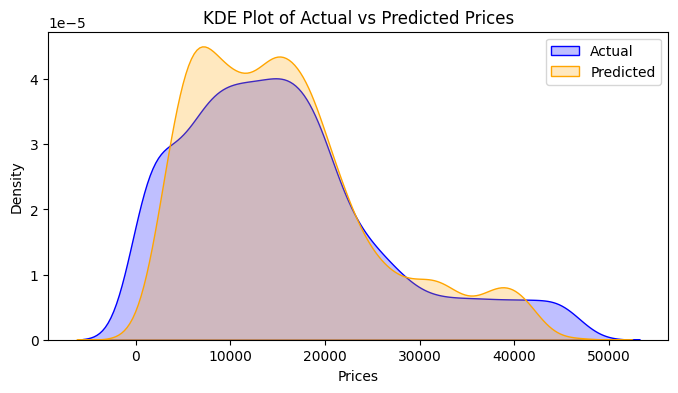

In [ ]:
plot_data = pd.DataFrame({'Actual': y_eval, 'Predicted': y_eval_pred})

# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()


<ipython-input-68-590cafc16ba2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')


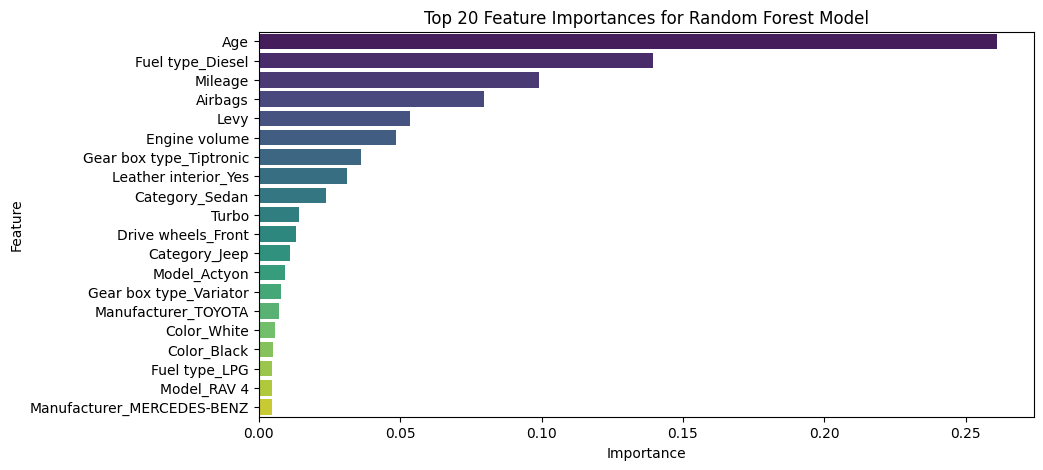

In [ ]:
feature_importances = rf_model.feature_importances_

# Get the column names from the original DataFrame (X_train)
feature_names = X_train.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Plot the feature importances for the top 20 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


82% test r2 score for RandomForest with OneHot encoding

Now using leaveOneOut encoding
 Leaveoneout encoding for Manufacturer, Model and Category. Rest is one hot encoded

Leave-One-Out Encoding (LOO Encoding) is a technique used in feature engineering for categorical variables, particularly in the context of supervised machine learning. It involves encoding categorical variables by calculating the mean of the target variable for each category, excluding the current instance being encoded. The process is as follows:

For each instance in a category, compute the mean of the target variable for all other instances in the same category. Replace the original categorical value with the computed mean for that instance. This technique aims to provide a more robust encoding by avoiding data leakage, as it calculates the mean by excluding the target value of the instance being encoded.

Advantages of Leave-One-Out Encoding:

Reduced Data Leakage:

LOO Encoding is designed to mitigate data leakage issues that can arise in target encoding, especially when there is a risk of overfitting to the target variable.

Preservation of Information:

By excluding the target value of the instance being encoded, LOO Encoding attempts to provide an unbiased estimate of the category's impact on the target variable.

Effective for Low Cardinality:

Particularly useful for categorical variables with low cardinality, where the number of instances in a category is limited.

Adaptability:

LOO Encoding can be adapted to different models and is applicable in various supervised learning scenarios.

Avoidance of Overfitting:

When used cautiously, LOO Encoding can help avoid overfitting to the target variable by providing a more general encoding strategy

In [ ]:
!pip install category-encoders

In [ ]:
from category_encoders import LeaveOneOutEncoder


col_to_encode = ['Manufacturer', 'Model', 'Category']
encoder = LeaveOneOutEncoder(cols=col_to_encode)
df_LOOencoded=encoder.fit_transform(df[col_to_encode],df['Price'])
df_LOOencoded


,Manufacturer,Model,Category
2,12950.279039,13525.783862,12541.097128
3,13894.243013,11831.820225,21709.553846
4,12945.927904,13516.391931,12539.720861
5,19933.788732,30913.129310,21696.088180
6,14481.108475,13457.557191,12543.911318
...,...,...,...
19225,6874.356757,7620.406250,9987.057416
19232,15518.275605,7682.166667,14940.011407
19233,19941.079608,12760.103261,13699.907205
19234,19937.887018,27971.504132,21701.110694


In [ ]:
df_LOO=pd.concat([df,df_LOOencoded.add_suffix('_LOO')],axis=1)
df_LOO

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age,Manufacturer_LOO,Model_LOO,Category_LOO
2,8467,906.838128,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,4.0,...,Front,04-May,Right-hand drive,Black,2,0,18,12950.279039,13525.783862,12541.097128
3,3607,862.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,...,4x4,04-May,Left wheel,White,0,0,13,13894.243013,11831.820225,21709.553846
4,11726,446.000000,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,...,Front,04-May,Left wheel,Silver,4,0,10,12945.927904,13516.391931,12539.720861
5,39493,891.000000,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,4.0,...,Front,04-May,Left wheel,White,4,0,8,19933.788732,30913.129310,21696.088180
6,1803,761.000000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909.0,4.0,...,Front,04-May,Left wheel,White,12,0,14,14481.108475,13457.557191,12543.911318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.000000,OPEL,Combo,Goods wagon,No,Diesel,1.7,236000.0,4.0,...,Front,04-May,Left wheel,Beige,4,1,17,6874.356757,7620.406250,9987.057416
19232,8467,906.838128,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000.0,4.0,...,Rear,02-Mar,Left wheel,Silver,5,1,25,15518.275605,7682.166667,14940.011407
19233,15681,831.000000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600.0,4.0,...,Front,04-May,Left wheel,Red,8,0,13,19941.079608,12760.103261,13699.907205
19234,26108,836.000000,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365.0,4.0,...,Front,04-May,Left wheel,Grey,4,0,14,19937.887018,27971.504132,21701.110694


In [ ]:
df_LOO.drop(['Manufacturer','Model','Category'],axis=1,inplace=True)

In [ ]:
df_LOO

,Price,Levy,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age,Manufacturer_LOO,Model_LOO,Category_LOO
2,8467,906.838128,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0,18,12950.279039,13525.783862,12541.097128
3,3607,862.000000,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,0,13,13894.243013,11831.820225,21709.553846
4,11726,446.000000,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0,10,12945.927904,13516.391931,12539.720861
5,39493,891.000000,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,04-May,Left wheel,White,4,0,8,19933.788732,30913.129310,21696.088180
6,1803,761.000000,Yes,Hybrid,1.8,258909.0,4.0,Automatic,Front,04-May,Left wheel,White,12,0,14,14481.108475,13457.557191,12543.911318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.000000,No,Diesel,1.7,236000.0,4.0,Manual,Front,04-May,Left wheel,Beige,4,1,17,6874.356757,7620.406250,9987.057416
19232,8467,906.838128,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1,25,15518.275605,7682.166667,14940.011407
19233,15681,831.000000,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0,13,19941.079608,12760.103261,13699.907205
19234,26108,836.000000,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0,14,19937.887018,27971.504132,21701.110694


In [ ]:
cols_to_encode=df_LOO.select_dtypes(include=['object']).columns
df_LOO_OHE_encoded = pd.get_dummies(df_LOO, columns=cols_to_encode,drop_first=True)

In [ ]:
for column in df_LOO_OHE_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if df_LOO_OHE_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        df_LOO_OHE_encoded[column] = df_LOO_OHE_encoded[column].astype(int)

In [ ]:
X = df_LOO_OHE_encoded.drop(columns=['Price','Cylinders'])
y = df_LOO_OHE_encoded['Price']

# Split the data into training and evaluation sets (70/30 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the evaluation data using the same scaler
X_eval_scaled = scaler.transform(X_eval)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Models dictionary
models = {'RandomForest': rf_model, 'XGBoost': xgb_model, 'LightGBM': lgb_model}

# Results dictionary
results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}

# Loop through models
for model_name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Predictions on the scaled training set
    y_train_pred = model.predict(X_train_scaled)

    # Predictions on the scaled evaluation set
    y_eval_pred = model.predict(X_eval_scaled)

    # Calculate MAE and R-squared for training and evaluation sets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_eval = mean_absolute_error(y_eval, y_eval_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_eval = r2_score(y_eval, y_eval_pred)

    # Append results to the dictionary
    results['Model'].append(model_name)
    results['MAE (Train)'].append(mae_train)
    results['MAE (Test)'].append(mae_eval)
    results['R-squared (Train)'].append(r2_train)
    results['R-squared (Test)'].append(r2_eval)

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1426
[LightGBM] [Info] Number of data points in the train set: 8853, number of used features: 36
[LightGBM] [Info] Start training from score 15748.646786


,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,RandomForest,123.545059,277.958738,0.997266,0.986375
1,XGBoost,302.883837,720.000115,0.997932,0.969333
2,LightGBM,468.987491,576.502197,0.990449,0.983656


In [ ]:
df_LOO_OHE_encoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Turbo,Age,Manufacturer_LOO,Model_LOO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
2,8467,906.838128,1.3,200000.0,4.0,2,0,18,12950.279039,13525.783862,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,2.5,168966.0,4.0,0,0,13,13894.243013,11831.820225,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.000000,1.3,91901.0,4.0,4,0,10,12945.927904,13516.391931,...,0,0,0,0,0,0,1,0,0,0
5,39493,891.000000,2.0,160931.0,4.0,4,0,8,19933.788732,30913.129310,...,0,0,0,0,0,0,0,0,1,0
6,1803,761.000000,1.8,258909.0,4.0,12,0,14,14481.108475,13457.557191,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.000000,1.7,236000.0,4.0,4,1,17,6874.356757,7620.406250,...,0,0,0,0,0,0,0,0,0,0
19232,8467,906.838128,2.0,300000.0,4.0,5,1,25,15518.275605,7682.166667,...,0,0,0,0,0,0,1,0,0,0
19233,15681,831.000000,2.4,161600.0,4.0,8,0,13,19941.079608,12760.103261,...,0,0,0,0,0,1,0,0,0,0
19234,26108,836.000000,2.0,116365.0,4.0,4,0,14,19937.887018,27971.504132,...,0,1,0,0,0,0,0,0,0,0


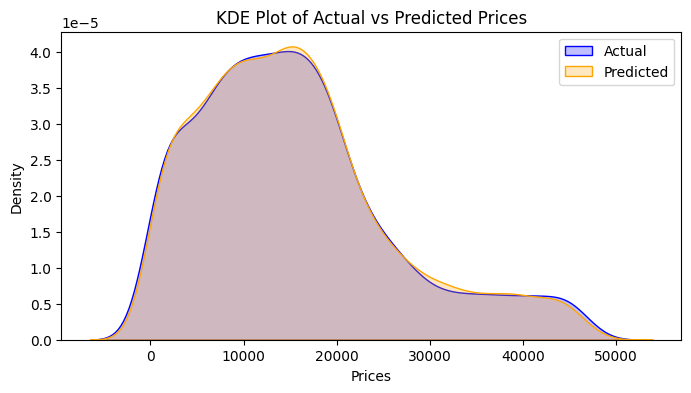

In [ ]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': y_eval, 'Predicted': y_eval_pred})

# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

<ipython-input-79-ba84bb3767aa>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')


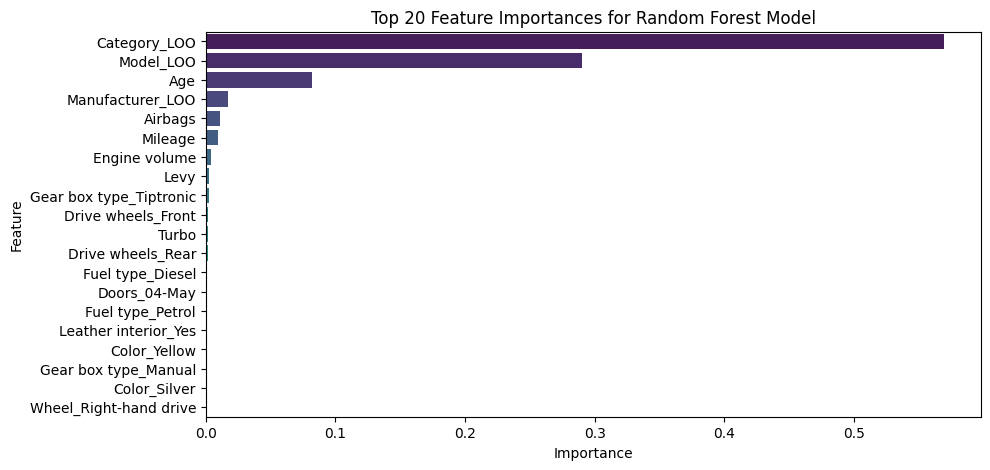

In [ ]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get the column names from the original DataFrame (X_train)
feature_names = X_train.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Plot the feature importances for the top 20 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 98.6% R-squared (Test) for Random Forest